In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/owid-co2-data.csv')

In [4]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46523 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   year                                       46523 non-null  int64  
 2   iso_code                                   39862 non-null  object 
 3   population                                 38574 non-null  float64
 4   gdp                                        14551 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

In [6]:
df['year'] = pd.to_datetime(df['year'], format='%Y')
# Create a new column with the same values as the 'year' column
df['year_copy'] = df['year']

# Set the 'year_copy' column as the index
df.set_index('year_copy', inplace=True)
#df.set_index('year', inplace=True)

In [7]:

start_date = pd.to_datetime('1751', format='%Y')
end_date = pd.to_datetime('2018', format='%Y')
co2_data = df.loc[(df.index >= start_date) & (df.index <= end_date), 'co2']
co2_data =co2_data.groupby(pd.Grouper(freq='Y')).sum()

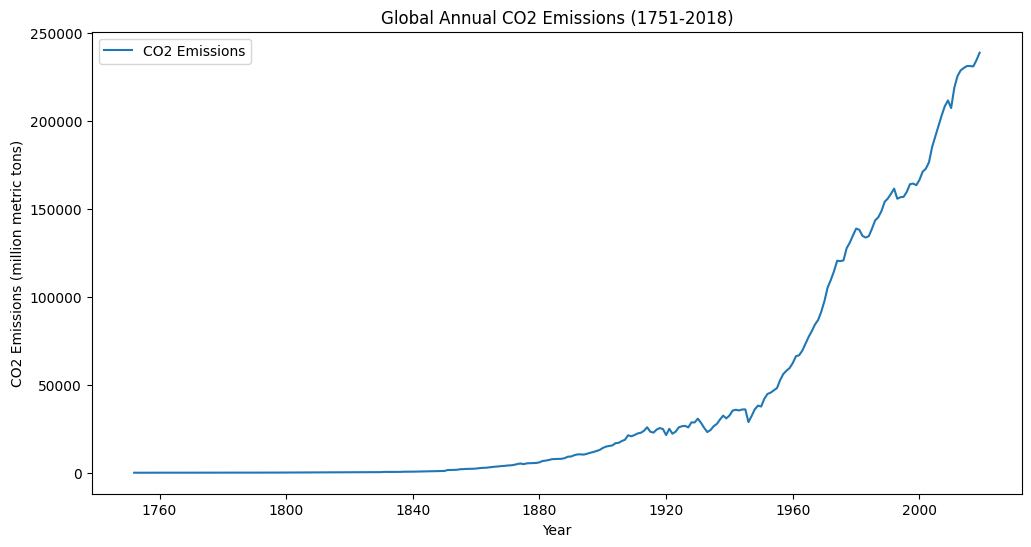

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.title('Global Annual CO2 Emissions (1751-2018)')
plt.legend()
plt.show()

In [9]:
start_date = pd.to_datetime('1751', format='%Y')
end_date = pd.to_datetime('2019', format='%Y')
co2_data1 = df.loc[(df.index >= start_date) & (df.index <= end_date), 'co2']
co2_data1 =co2_data1.groupby(pd.Grouper(freq='Y')).sum()

In [10]:
print(co2_data1)

year_copy
1751-12-31        56.106
1752-12-31        56.124
1753-12-31        56.124
1754-12-31        56.148
1755-12-31        56.172
                 ...    
2015-12-31    231156.163
2016-12-31    230973.213
2017-12-31    234500.508
2018-12-31    238741.382
2019-12-31    239925.740
Freq: A-DEC, Name: co2, Length: 269, dtype: float64


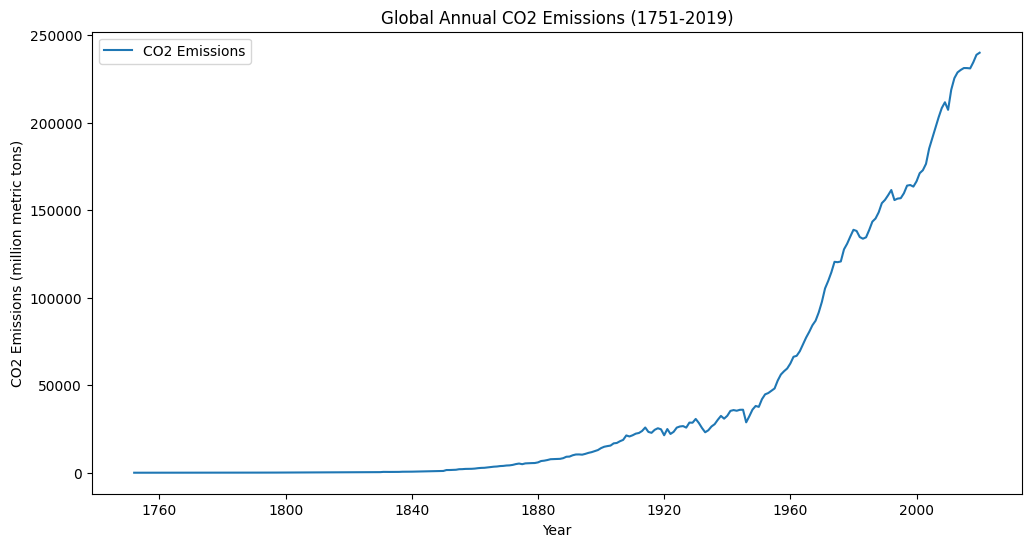

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(co2_data1.index, co2_data1, label='CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.title('Global Annual CO2 Emissions (1751-2019)')
plt.legend()
plt.show()

In [12]:
start_date = pd.to_datetime('1751', format='%Y')
end_date = pd.to_datetime('2021', format='%Y')
co2_data2 = df.loc[(df.index >= start_date) & (df.index <= end_date), 'co2']
co2_data2 =co2_data2.groupby(pd.Grouper(freq='Y')).sum()

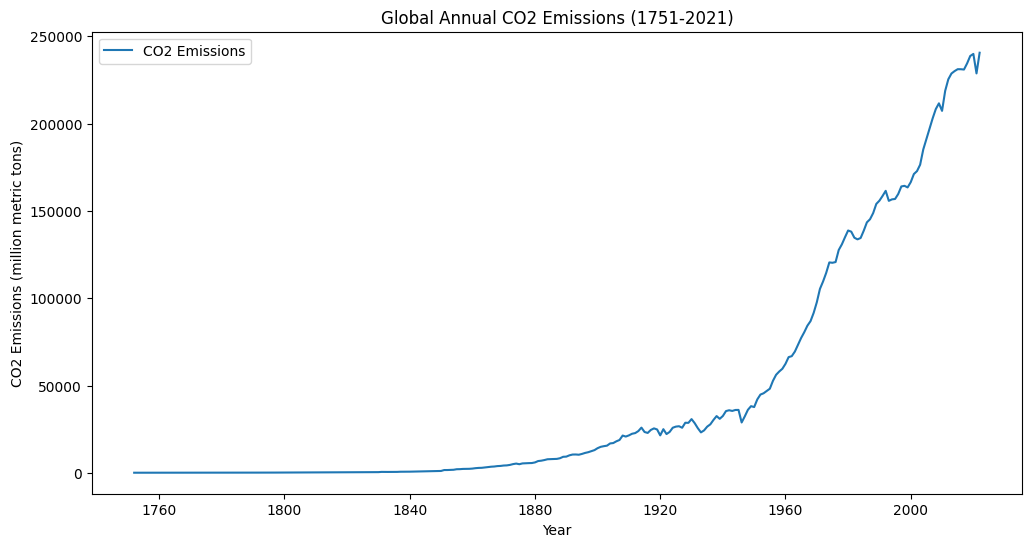

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(co2_data2.index, co2_data2, label='CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.title('Global Annual CO2 Emissions (1751-2021)')
plt.legend()
plt.show()

In [14]:
start_date = pd.to_datetime('1751', format='%Y')
end_date = pd.to_datetime('2023', format='%Y')
co2_data3 = df.loc[(df.index >= start_date) & (df.index <= end_date), 'co2']
co2_data3 =co2_data3.groupby(pd.Grouper(freq='Y')).sum()

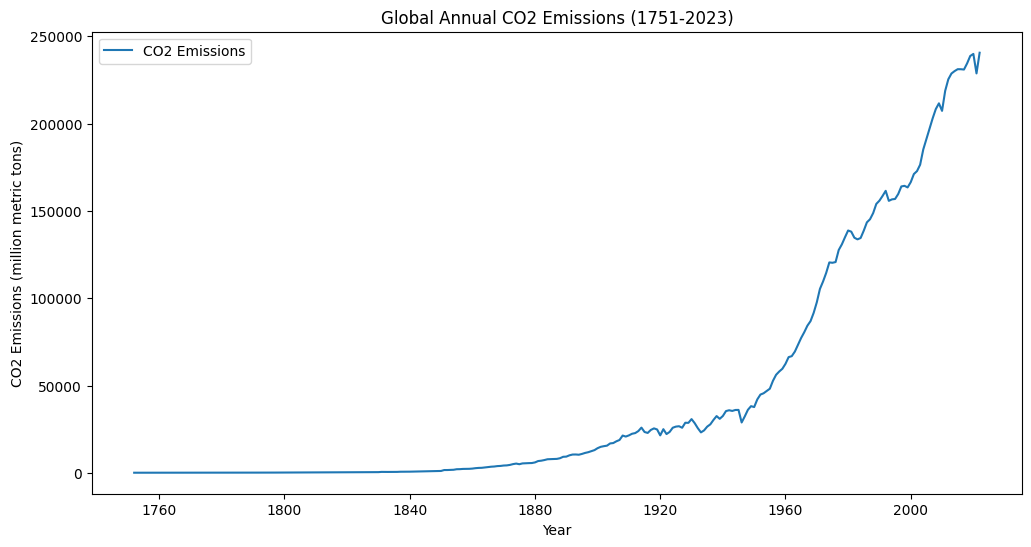

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(co2_data2.index, co2_data2, label='CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.title('Global Annual CO2 Emissions (1751-2023)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


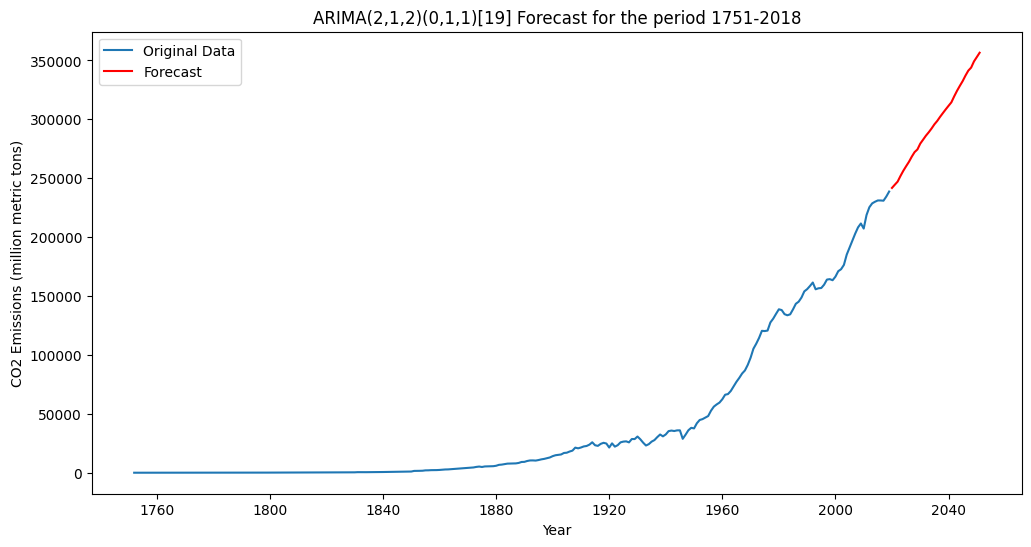

MAPE: 58.57%


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Calculate MAPE
def calculate_mape(actual, forecast):
    actual = np.nan_to_num(actual)
    forecast = np.nan_to_num(forecast)
    return (np.abs(actual - forecast) / actual).mean() * 100

# Selecting the data for the period 1751-2018
start_date = pd.to_datetime('1751', format='%Y')
end_date = pd.to_datetime('2018', format='%Y')
co2_data = df.loc[(df.index >= start_date) & (df.index <= end_date), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Fit the ARIMA model
model = ARIMA(co2_data, order=(1, 1, 2), seasonal_order=(0, 1, 1, 19))
model_fit = model.fit()

# Forecasting for 32 years
forecast_years = 32
forecast = model_fit.forecast(steps=forecast_years)

# Calculate the actual values for the period 1751-2018
actual_values = co2_data[-forecast_years:]

# Calculate the MAPE
mape = calculate_mape(actual_values, forecast)

# Plotting the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Original Data')
plt.plot(forecast.index, forecast, color='red', label='Forecast')
#plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.title('ARIMA(2,1,2)(0,1,1)[19] Forecast for the period 1751-2018')
plt.legend()
plt.show()

print(f"MAPE: {mape:.2f}%")


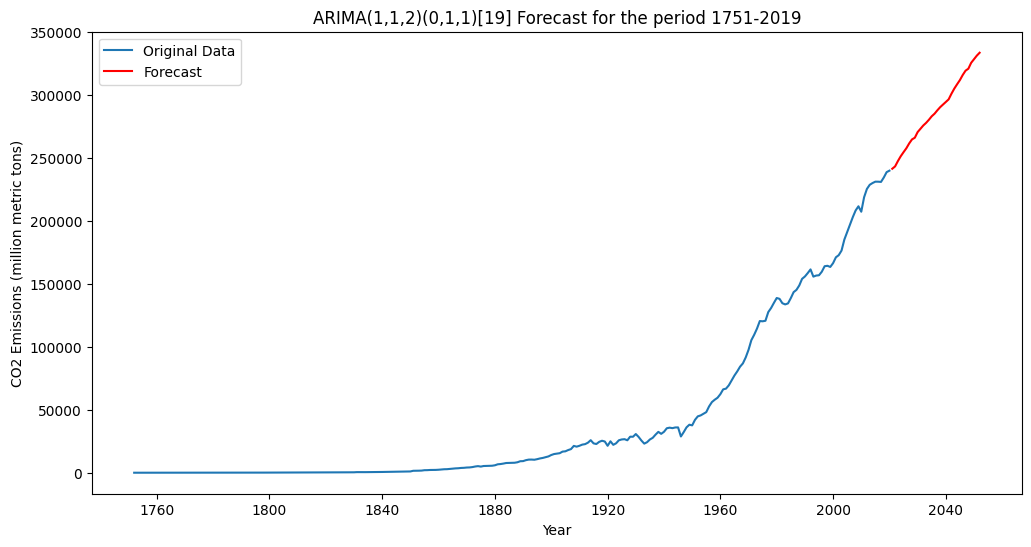

MAPE: 51.19%


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Calculate MAPE
def calculate_mape(actual, forecast):
    actual = np.nan_to_num(actual)
    forecast = np.nan_to_num(forecast)
    return (np.abs(actual - forecast) / actual).mean() * 100

# Selecting the data for the period 1751-2019
start_date = pd.to_datetime('1751', format='%Y')
end_date = pd.to_datetime('2019', format='%Y')
co2_data = df.loc[(df.index >= start_date) & (df.index <= end_date), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Fit the ARIMA model
model = ARIMA(co2_data, order=(1, 1, 2), seasonal_order=(0, 1, 1, 19))
model_fit = model.fit()

# Forecasting for 32 years
forecast_years = 32
forecast = model_fit.forecast(steps=forecast_years)

# Calculate the actual values for the period 1751-2019
actual_values = co2_data[-forecast_years:]

# Calculate the MAPE
mape = calculate_mape(actual_values, forecast)

# Plotting the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Original Data')
plt.plot(forecast.index, forecast, color='red', label='Forecast')
#plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.title('ARIMA(1,1,2)(0,1,1)[19] Forecast for the period 1751-2019')
plt.legend()
plt.show()

print(f"MAPE: {mape:.2f}%")


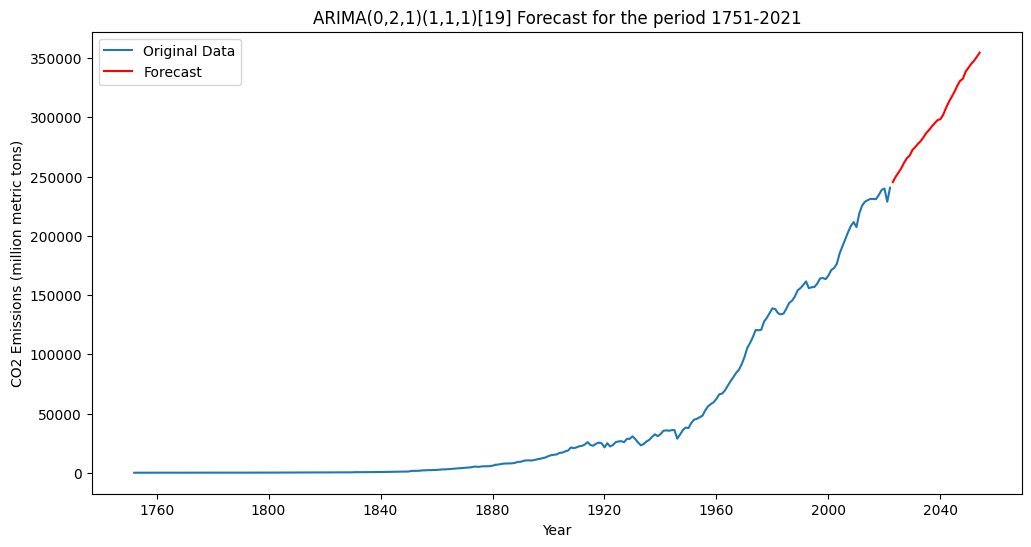

MAPE: 53.12%


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Calculate MAPE
def calculate_mape(actual, forecast):
    actual = np.nan_to_num(actual)
    forecast = np.nan_to_num(forecast)
    return (np.abs(actual - forecast) / actual).mean() * 100

# Selecting the data for the period 1751-2021
start_date = pd.to_datetime('1751', format='%Y')
end_date = pd.to_datetime('2021', format='%Y')
co2_data = df.loc[(df.index >= start_date) & (df.index <= end_date), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Fit the ARIMA model
model = ARIMA(co2_data, order=(0, 2, 1), seasonal_order=(1, 1, 1, 19))
model_fit = model.fit()

# Forecasting for 32 years
forecast_years = 32
forecast = model_fit.forecast(steps=forecast_years)

# Calculate the actual values for the period 1751-2021
actual_values = co2_data[-forecast_years:]

# Calculate the MAPE
mape = calculate_mape(actual_values, forecast)

# Plotting the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Original Data')
plt.plot(forecast.index, forecast, color='red', label='Forecast')
#plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.title('ARIMA(0,2,1)(1,1,1)[19] Forecast for the period 1751-2021')
plt.legend()
plt.show()

print(f"MAPE: {mape:.2f}%")


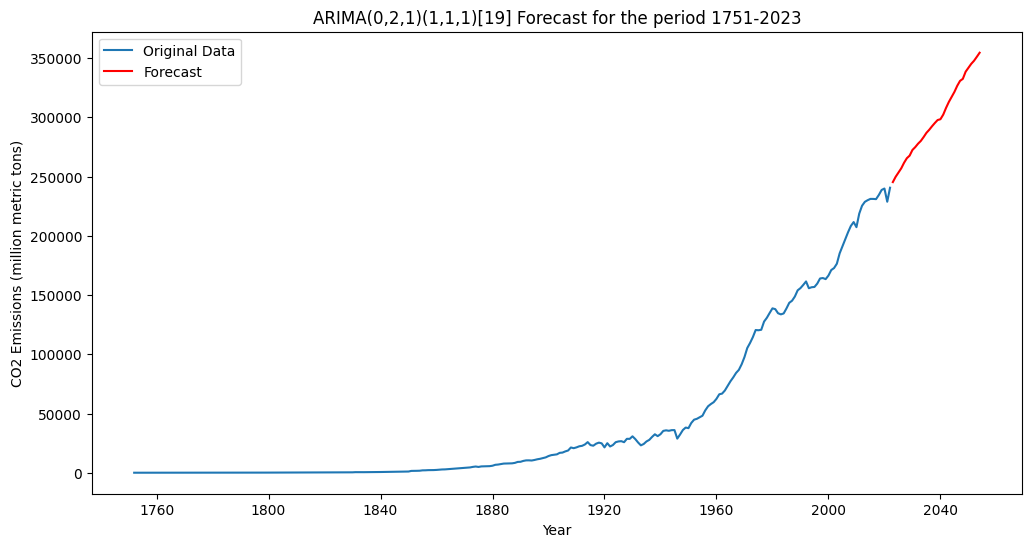

MAPE: 53.12%


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Calculate MAPE
def calculate_mape(actual, forecast):
    actual = np.nan_to_num(actual)
    forecast = np.nan_to_num(forecast)
    return (np.abs(actual - forecast) / actual).mean() * 100

# Selecting the data for the period 1751-2023
start_date = pd.to_datetime('1751', format='%Y')
end_date = pd.to_datetime('2023', format='%Y')
co2_data = df.loc[(df.index >= start_date) & (df.index <= end_date), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Fit the ARIMA model
model = ARIMA(co2_data, order=(0, 2, 1), seasonal_order=(1, 1, 1, 19))
model_fit = model.fit()

# Forecasting for 32 years
forecast_years = 32
forecast = model_fit.forecast(steps=forecast_years)

# Calculate the actual values for the period 1751-2023
actual_values = co2_data[-forecast_years:]

# Calculate the MAPE
mape = calculate_mape(actual_values, forecast)

# Plotting the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Original Data')
plt.plot(forecast.index, forecast, color='red', label='Forecast')
#plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.title('ARIMA(0,2,1)(1,1,1)[19] Forecast for the period 1751-2023')
plt.legend()
plt.show()

print(f"MAPE: {mape:.2f}%")


In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Convert 'year' column to datetime type if needed
df['year'] = pd.to_datetime(df['year'])

# Prepare the features (GDP and population) and target variable (CO2 emissions)
X = df['population']
y = df['co2']

if X.shape[0] > 0:
    # Drop rows with missing values in both X and y
    combined_data = pd.concat([X, y], axis=1).dropna()

    if combined_data.shape[0] > 0:
        # Separate X and y again
        X = combined_data['population']
        y = combined_data['co2']

        # Create an imputer to fill missing values with column means
        imputer = SimpleImputer(strategy='mean')
        X = imputer.fit_transform(X.values.reshape(-1, 1))

        # Create and train the linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Filter the DataFrame for the years 2019, 2020, 2021, and 2022
        years = [2019, 2020, 2021, 2022]
        data_years = df[df['year'].dt.year.isin(years)]

        if data_years.shape[0] > 0:
            # Prepare the features for the selected years
            X_years = data_years['population']
            X_years = imputer.transform(X_years.values.reshape(-1, 1))

            # Predict CO2 emissions for the selected years
            y_pred_years = model.predict(X_years)

            if isinstance(y_pred_years, float):
                y_pred_years = [y_pred_years]

            # Calculate the total carbon emissions for each year
            total_emissions_years = sum(y_pred_years)

            for year, total_emissions in zip(years, [total_emissions_years]):
                print(f'Total carbon emissions in {year}: {total_emissions}')
        else:
            print('No data available for the selected years.')
    else:
        print('Insufficient data after dropping missing values.')
else:
    print('No data available.')


Total carbon emissions in 2019: 313239.3879740374


In [21]:
co2_emissions_2019 = co2_data2.loc['2019']
print("Annual CO2 emissions in 2019:", co2_emissions_2019)

Annual CO2 emissions in 2019: year_copy
2019-12-31    239925.74
Freq: A-DEC, Name: co2, dtype: float64


In [22]:
co2_emissions_2019 = co2_data2.loc['2019'] / 10000
print("Annual CO2 emissions in 2019 (gigatons):", co2_emissions_2019)


Annual CO2 emissions in 2019 (gigatons): year_copy
2019-12-31    23.992574
Freq: A-DEC, Name: co2, dtype: float64


In [23]:
import pandas as pd


# Convert 'year' column to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Filter the dataset for years 1918-1919
start_date = pd.to_datetime('1918', format='%Y')
end_date = pd.to_datetime('1919', format='%Y')
co2_data = df[(df['year'] >= start_date) & (df['year'] <= end_date)]

# Group by country and calculate the total carbon emissions
grouped_data = co2_data.groupby('country')['co2'].sum().reset_index()

# Sort the data by total emissions in descending order
grouped_data = grouped_data.sort_values('co2', ascending=False)

# Display the table
print(grouped_data)


                   country       co2
237                  World  6521.400
162             OECD (GCP)  6179.186
97   High-income countries  6114.286
156          North America  3465.630
157    North America (GCP)  3464.213
..                     ...       ...
105                   Iraq     0.000
107            Isle of Man     0.000
108                 Israel     0.000
110                Jamaica     0.000
120                Lebanon     0.000

[241 rows x 2 columns]


In [24]:
# Convert 'year' column to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Filter the dataset for the year 1919
year = pd.to_datetime('1919', format='%Y')
co2_data = df[df['year'] == year]

# Group by country and calculate the total carbon emissions
grouped_data = co2_data.groupby('country')['co2'].sum().reset_index()

# Sort the data by total emissions in descending order
grouped_data = grouped_data.sort_values('co2', ascending=False)

# Display the table
print(grouped_data)

                   country       co2
237                  World  3028.560
162             OECD (GCP)  2852.637
97   High-income countries  2815.243
156          North America  1596.982
157    North America (GCP)  1596.334
..                     ...       ...
105                   Iraq     0.000
107            Isle of Man     0.000
108                 Israel     0.000
110                Jamaica     0.000
120                Lebanon     0.000

[241 rows x 2 columns]


In [25]:
import pandas as pd

# Select the data for the period 1918-2021 in the world
start_date = pd.to_datetime('1918', format='%Y')
end_date = pd.to_datetime('2021', format='%Y')
co2_data_world = df.loc[(df['year'] >= start_date) & (df['year'] <= end_date) & (df['country'] == 'World')]

# Create a table of CO2 emissions for each year between 1918 and 2021
co2_table = pd.DataFrame({'Year': co2_data_world['year'], 'CO2 Emissions': co2_data_world['co2']})

# Display the table
print(co2_table)


                 Year  CO2 Emissions
year_copy                           
1918-01-01 1918-01-01       3492.840
1919-01-01 1919-01-01       3028.560
1920-01-01 1920-01-01       3521.062
1921-01-01 1921-01-01       3089.464
1922-01-01 1922-01-01       3239.736
...               ...            ...
2017-01-01 2017-01-01      36096.738
2018-01-01 2018-01-01      36826.508
2019-01-01 2019-01-01      37082.559
2020-01-01 2020-01-01      35264.086
2021-01-01 2021-01-01      37123.852

[104 rows x 2 columns]


In [26]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.9 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.41 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3471.422, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3423.061, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3335.012, Time=0.93 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3335.796, Time=1.34 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3335.408, Time=1.53 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3328.974, Time=2.70 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=2.89 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=3334.519, Time=2.13 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=3335.112, Time=1.18 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=inf, Time=4.25 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.99 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 21.638 seconds
Optimal SARIMA Parameters:
p: 1, d: 2, q: 2
P: 0, D: 0, Q: 0, S: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


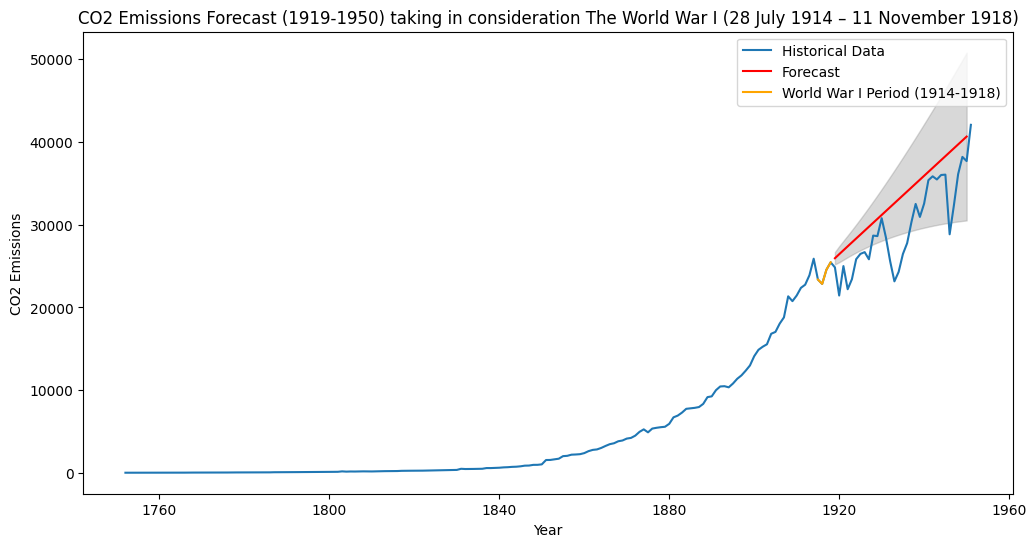

CO2 Emissions During World War I (1914-1918):
year_copy
1914-12-31    23371.559
1915-12-31    22845.777
1916-12-31    24560.298
1917-12-31    25450.989
Freq: A-DEC, Name: co2, dtype: float64
Total Forecasted CO2 Emissions: 1065426.55
Mean Absolute Percentage Error (MAPE): 13.89%


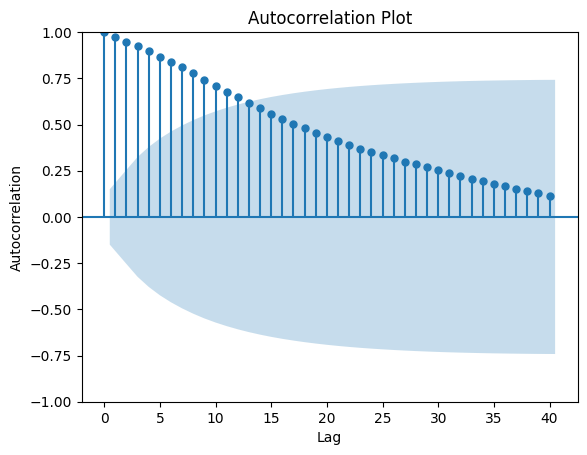

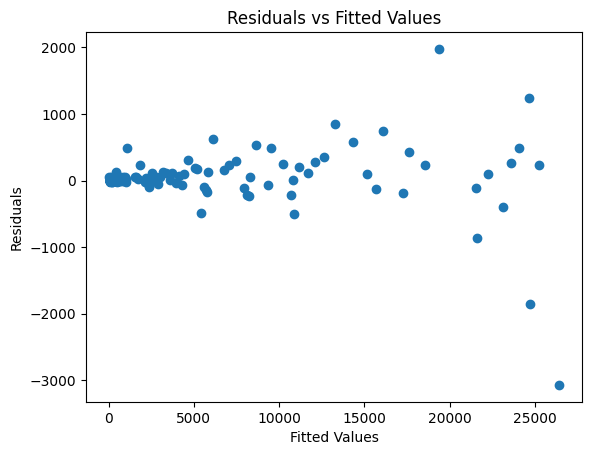

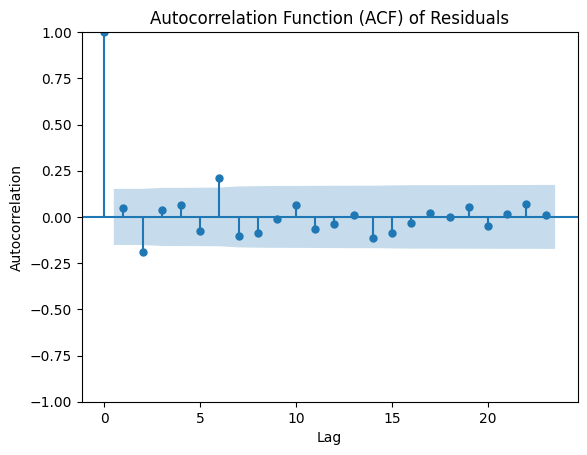

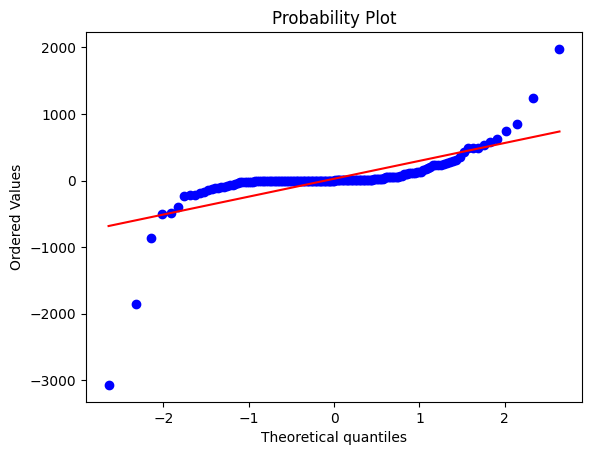

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Select the data for the period 1751-1919
start_date = pd.to_datetime('1751', format='%Y')
start_date_war = pd.to_datetime('1914', format='%Y')
end_date_train = pd.to_datetime('1918', format='%Y')
end_date_war = pd.to_datetime('1918', format='%Y')
end_date_forecast = pd.to_datetime('1950', format='%Y')
co2_data = df.loc[(df['year'] >= start_date) & (df['year'] <= end_date_forecast), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Calculate optimal parameters for SARIMA using auto_arima
sarima_model = auto_arima(co2_data, seasonal=True, stepwise=True, suppress_warnings=True,trace=True)

# Get optimal SARIMA parameters
optimal_p, optimal_d, optimal_q = sarima_model.order
optimal_P, optimal_D, optimal_Q, _ = sarima_model.seasonal_order


# Get optimal SARIMA parameters
optimal_p, optimal_d, optimal_q = sarima_model.order
optimal_P, optimal_D, optimal_Q, optimal_S = sarima_model.seasonal_order
# Manually specify the seasonal component based on domain knowledge
optimal_S = 1  # Change this value according to your data's seasonal pattern

print(f"Optimal SARIMA Parameters:")
print(f"p: {optimal_p}, d: {optimal_d}, q: {optimal_q}")
print(f"P: {optimal_P}, D: {optimal_D}, Q: {optimal_Q}, S: {optimal_S}")



# Train the SARIMA model using the optimal parameters
train_data = co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_train)]
sarima_model_fit = ARIMA(train_data, order=(optimal_p, optimal_d, optimal_q), seasonal_order=(optimal_P, optimal_D, optimal_Q, 12)).fit()

# Get CO2 values during the World War period
war_data = co2_data.loc[(co2_data.index > start_date_war) & (co2_data.index <= end_date_war)]

# Combine training data with World War period data
train_data = pd.concat([train_data, war_data])

# Forecasting for the period 1919-2021
forecast_years = end_date_forecast.year - end_date_war.year
forecast = sarima_model_fit.get_forecast(steps=forecast_years)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Calculate the total forecasted CO2 emissions
total_forecast = forecast_values.sum()

# Calculate the MAPE
mape = (abs(co2_data.loc[end_date_war:end_date_forecast] - forecast_values) / co2_data.loc[end_date_war:end_date_forecast]).mean() * 100

# Plotting the actual data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Historical Data')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.plot(war_data.index, war_data, color='orange', label='World War I Period (1914-1918)')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Forecast (1919-1950) taking in consideration The World War I (28 July 1914 – 11 November 1918)')
plt.legend()
plt.savefig("ww1.eps") #save as eps
plt.show()
print(f"CO2 Emissions During World War I (1914-1918):")
print(war_data)
print(f"Total Forecasted CO2 Emissions: {total_forecast:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
from sklearn.metrics import r2_score

from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function (ACF)
plot_acf(train_data, lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Remove NaN values from the actual data and forecasted values
actual_values = co2_data.loc[end_date_war:end_date_forecast].values
forecast_values = forecast_values[~np.isnan(actual_values)]
actual_values = actual_values[~np.isnan(actual_values)]
fitted_values = sarima_model_fit.fittedvalues

# Plot residuals against fitted values
plt.scatter(fitted_values, sarima_model_fit.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function (ACF) of the residuals
plot_acf(sarima_model_fit.resid)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()


import scipy.stats as stats

# Create a Q-Q plot of residuals
qq_values = stats.probplot(sarima_model_fit.resid, dist="norm", plot=plt)


Optimal SARIMA Parameters:
p: 1, d: 2, q: 2
P: 0, D: 0, Q: 0, S: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


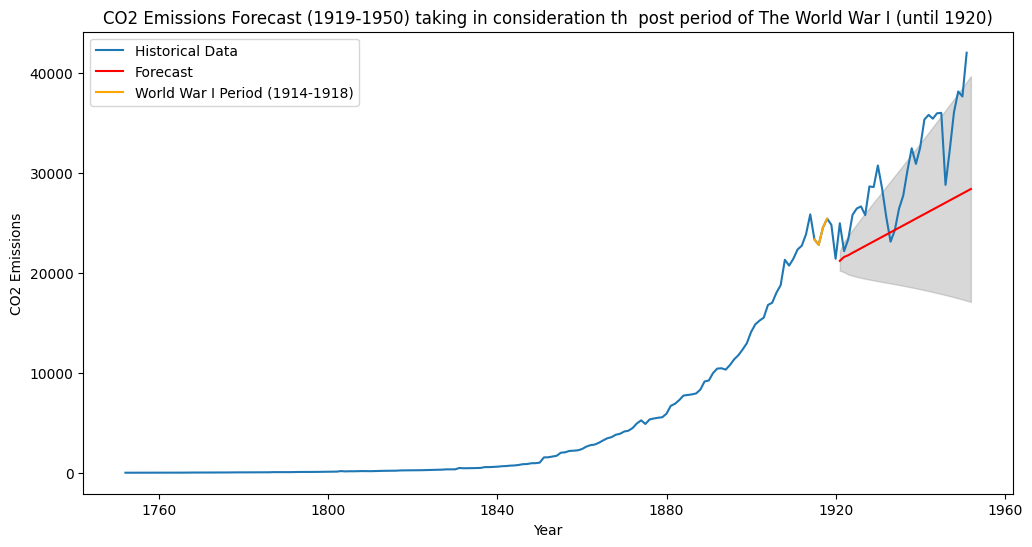

CO2 Emissions During World War I (1914-1918):
year_copy
1914-12-31    23371.559
1915-12-31    22845.777
1916-12-31    24560.298
1917-12-31    25450.989
Freq: A-DEC, Name: co2, dtype: float64
Total Forecasted CO2 Emissions: 796378.66
Mean Absolute Percentage Error (MAPE): 16.65%


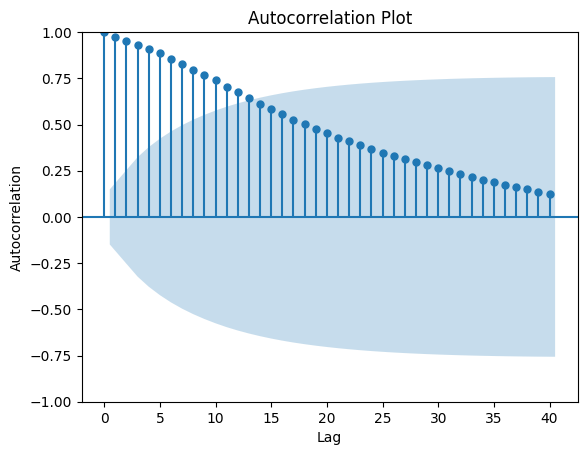

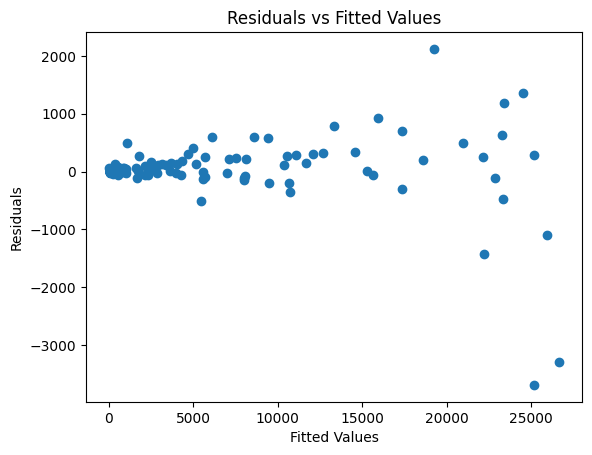

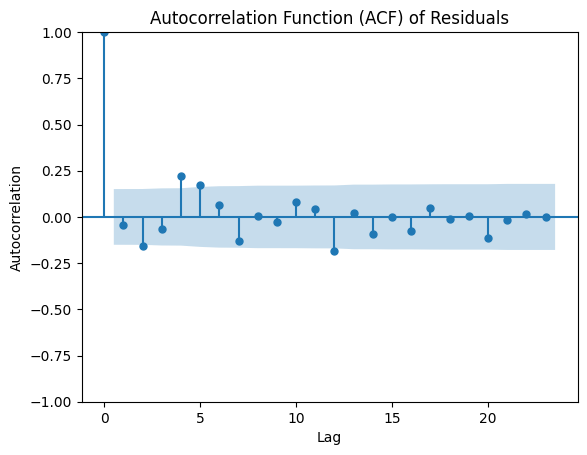

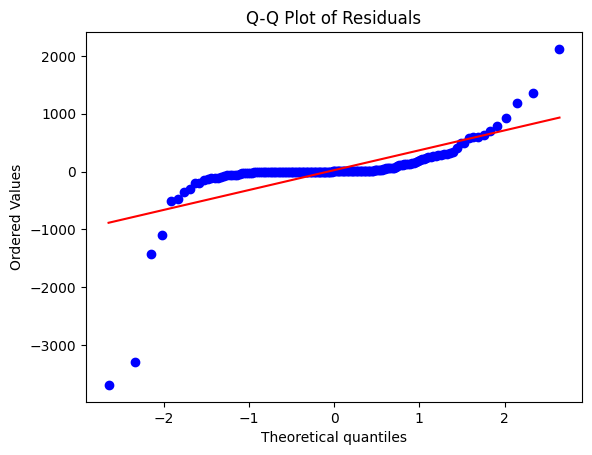

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Select the data for the period 1751-1919
start_date = pd.to_datetime('1751', format='%Y')
start_date_war = pd.to_datetime('1914', format='%Y')
end_date_train = pd.to_datetime('1920', format='%Y')
end_date_war = pd.to_datetime('1918', format='%Y')
end_date_forecast = pd.to_datetime('1950', format='%Y')
co2_data = df.loc[(df['year'] >= start_date) & (df['year'] <= end_date_forecast), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Calculate optimal parameters for SARIMA using auto_arima
sarima_model = auto_arima(co2_data, seasonal=True, stepwise=True, suppress_warnings=True)

# Get optimal SARIMA parameters
optimal_p, optimal_d, optimal_q = sarima_model.order
optimal_P, optimal_D, optimal_Q, optimal_S = sarima_model.seasonal_order
# Manually specify the seasonal component based on domain knowledge
optimal_S = 1  # Change this value according to your data's seasonal pattern

print(f"Optimal SARIMA Parameters:")
print(f"p: {optimal_p}, d: {optimal_d}, q: {optimal_q}")
print(f"P: {optimal_P}, D: {optimal_D}, Q: {optimal_Q}, S: {optimal_S}")



# Train the SARIMA model using the optimal parameters
train_data = co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_train)]
sarima_model_fit = ARIMA(train_data, order=(optimal_p, optimal_d, optimal_q), seasonal_order=(optimal_P, optimal_D, optimal_Q, 12)).fit()

# Get CO2 values during the World War period
war_data = co2_data.loc[(co2_data.index > start_date_war) & (co2_data.index <= end_date_war)]

# Combine training data with World War period data
train_data = pd.concat([train_data, war_data])

# Forecasting for the period 1919-2021
forecast_years = end_date_forecast.year - end_date_war.year
forecast = sarima_model_fit.get_forecast(steps=forecast_years)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Calculate the total forecasted CO2 emissions
total_forecast = forecast_values.sum()

# Calculate the MAPE
mape = (abs(co2_data.loc[end_date_war:end_date_forecast] - forecast_values) / co2_data.loc[end_date_war:end_date_forecast]).mean() * 100

# Plotting the actual data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Historical Data')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.plot(war_data.index, war_data, color='orange', label='World War I Period (1914-1918)')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Forecast (1919-1950) taking in consideration th  post period of The World War I (until 1920)')
plt.legend()
plt.savefig("post_ww1.eps") #save as eps
plt.show()
print(f"CO2 Emissions During World War I (1914-1918):")
print(war_data)
print(f"Total Forecasted CO2 Emissions: {total_forecast:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function (ACF)
plot_acf(train_data, lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

# Remove NaN values from the actual data and forecasted values
actual_values = co2_data.loc[end_date_war:end_date_forecast].values
forecast_values = forecast_values[~np.isnan(actual_values)]
actual_values = actual_values[~np.isnan(actual_values)]
fitted_values = sarima_model_fit.fittedvalues

# Plot residuals against fitted values
plt.scatter(fitted_values, sarima_model_fit.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function (ACF) of the residuals
plot_acf(sarima_model_fit.resid)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

residuals = sarima_model_fit.resid

# Generate Q-Q plot
qq_values = stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# Save the plot as EPS
plt.savefig('qq_plot_residuals.eps', format='eps')

# Display the plot
plt.show()



Optimal SARIMA Parameters:
p: 1, d: 2, q: 2
P: 0, D: 0, Q: 0, S: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


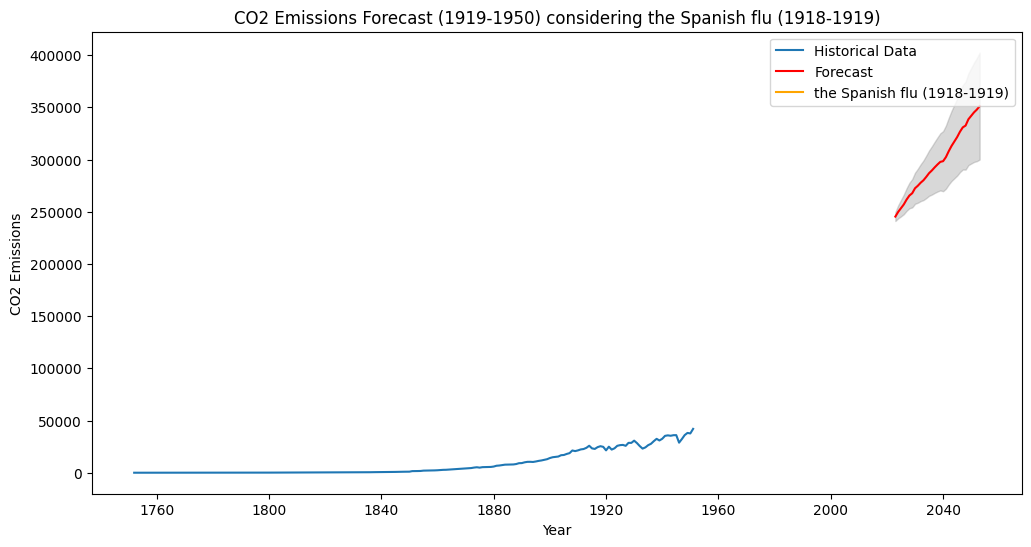

<Figure size 800x600 with 0 Axes>

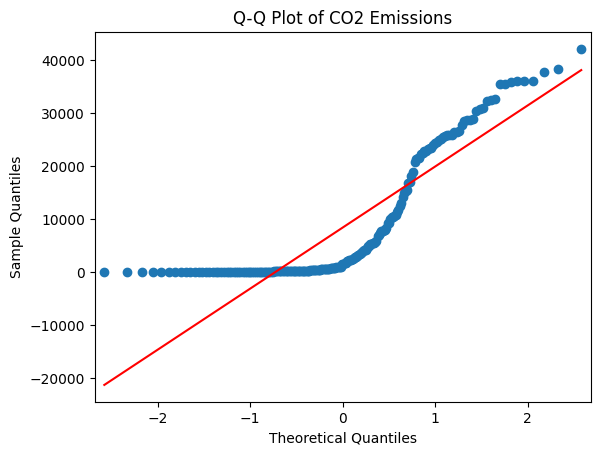

CO2 Emissions During the Spanish Flu (1918-1919):
year_copy
1918-12-31    24842.169
Freq: A-DEC, Name: co2, dtype: float64
Total CO2 Emissions During the Spanish Flu: 24842.17
Total Forecasted CO2 Emissions: 9225602.78
Mean Absolute Percentage Error (MAPE): nan%


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

# Select the data for the period 1751-1919
start_date = pd.to_datetime('1751', format='%Y')
start_date_flu = pd.to_datetime('1918', format='%Y')
end_date_flu = pd.to_datetime('1919', format='%Y')  # Define end date for Spanish flu period
end_date_train = pd.to_datetime('1919', format='%Y')  # Update end date for training data
end_date_forecast = pd.to_datetime('1950', format='%Y')
co2_data = df.loc[(df['year'] >= start_date) & (df['year'] <= end_date_forecast), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Calculate optimal parameters for SARIMA using auto_arima
sarima_model = auto_arima(co2_data, seasonal=True, stepwise=True, suppress_warnings=True)

# Get optimal SARIMA parameters
optimal_p, optimal_d, optimal_q = sarima_model.order
optimal_P, optimal_D, optimal_Q, optimal_S = sarima_model.seasonal_order
# Manually specify the seasonal component based on domain knowledge
optimal_S = 1  # Change this value according to your data's seasonal pattern

print(f"Optimal SARIMA Parameters:")
print(f"p: {optimal_p}, d: {optimal_d}, q: {optimal_q}")
print(f"P: {optimal_P}, D: {optimal_D}, Q: {optimal_Q}, S: {optimal_S}")

# Train the SARIMA model using the optimal parameters
train_data = co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_train)]
sarima_model_fit = ARIMA(train_data, order=(optimal_p, optimal_d, optimal_q), seasonal_order=(optimal_P, optimal_D, optimal_Q, 12)).fit()

# Get CO2 values during the Spanish flu period
flu_data = co2_data.loc[(co2_data.index > start_date_flu) & (co2_data.index <= end_date_flu)]

# Combine training data with Spanish flu period data
train_data = pd.concat([train_data, flu_data])

# Forecasting for the period 1919-2021
forecast_years = end_date_forecast.year - end_date_flu.year
forecast = model_fit.get_forecast(steps=forecast_years)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Calculate the total forecasted CO2 emissions
total_forecast = forecast_values.sum()
# Calculate CO2 emissions during the Spanish flu period
co2_emissions_during_flu = flu_data.sum()
# Plotting the actual data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Historical Data')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.plot(flu_data.index, flu_data, color='orange', label='the Spanish flu (1918-1919)')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Forecast (1919-1950) considering the Spanish flu (1918-1919)')
plt.legend()
plt.savefig("spanishflu.eps") #save as eps


# Q-Q plot
plt.figure(figsize=(8, 6))
qqplot(co2_data, line='s')
plt.title('Q-Q Plot of CO2 Emissions')
plt.savefig("qq_plot.eps") #save as eps
plt.show()

print(f"CO2 Emissions During the Spanish Flu (1918-1919):")
print(flu_data)
print(f"Total CO2 Emissions During the Spanish Flu: {co2_emissions_during_flu:.2f}")
print(f"Total Forecasted CO2 Emissions: {total_forecast:.2f}")
# Calculate the MAPE
mape = (abs(co2_data.loc[start_date_flu:end_date_flu] - forecast_values.loc[start_date_flu:end_date_flu]) / co2_data.loc[start_date_flu:end_date_flu]).mean() * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Optimal SARIMA Parameters:
p: 1, d: 2, q: 2
P: 0, D: 0, Q: 0, S: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


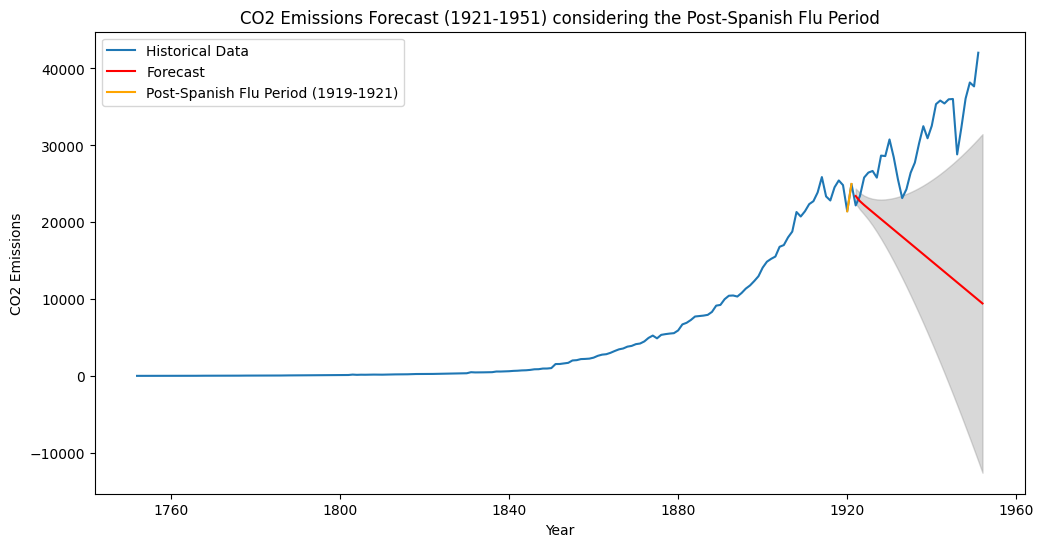

<Figure size 800x600 with 0 Axes>

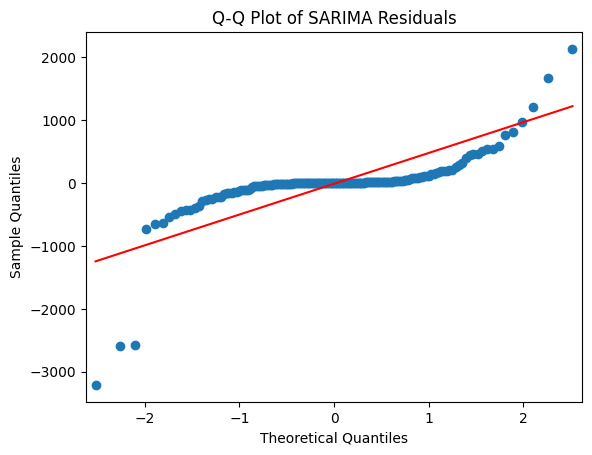

CO2 Emissions During the Post-Spanish Flu Period (1919-1921):
year_copy
1919-12-31    21446.094
1920-12-31    24997.031
Freq: A-DEC, Name: co2, dtype: float64
Total Forecasted CO2 Emissions: 506056.91
Mean Absolute Percentage Error (MAPE): 41.52%


<Figure size 800x600 with 0 Axes>

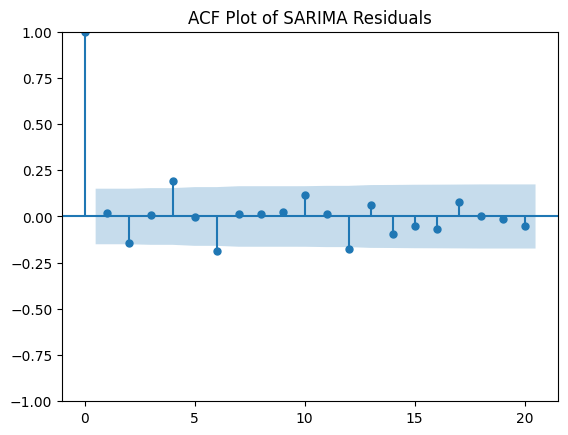

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.gofplots import qqplot

# Select the data for the period 1751-1919
start_date = pd.to_datetime('1751', format='%Y')
start_date_flu = pd.to_datetime('1918', format='%Y')
end_date_train = pd.to_datetime('1921', format='%Y')
end_date_flu = pd.to_datetime('1919', format='%Y')
end_date_forecast = pd.to_datetime('1950', format='%Y')
co2_data = df.loc[(df['year'] >= start_date) & (df['year'] <= end_date_forecast), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Calculate optimal parameters for SARIMA using auto_arima
sarima_model = auto_arima(co2_data, seasonal=True, stepwise=True, suppress_warnings=True)

# Get optimal SARIMA parameters
optimal_p, optimal_d, optimal_q = sarima_model.order
optimal_P, optimal_D, optimal_Q, optimal_S = sarima_model.seasonal_order
# Manually specify the seasonal component based on domain knowledge
optimal_S = 1  # Change this value according to your data's seasonal pattern

print(f"Optimal SARIMA Parameters:")
print(f"p: {optimal_p}, d: {optimal_d}, q: {optimal_q}")
print(f"P: {optimal_P}, D: {optimal_D}, Q: {optimal_Q}, S: {optimal_S}")

# Train the SARIMA model using the optimal parameters
train_data = co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_train)]
sarima_model_fit = ARIMA(train_data, order=(optimal_p, optimal_d, optimal_q), seasonal_order=(optimal_P, optimal_D, optimal_Q, 12)).fit()

# Get CO2 values during the post-Spanish Flu period
post_flu_data = co2_data.loc[(co2_data.index > end_date_flu) & (co2_data.index <= end_date_train)]

# Combine training data with post-Spanish Flu period data
train_data = pd.concat([train_data, post_flu_data])

# Forecasting for the period 1920-2021
forecast_years = end_date_forecast.year - end_date_flu.year
forecast = sarima_model_fit.get_forecast(steps=forecast_years)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Calculate the total forecasted CO2 emissions
total_forecast = forecast_values.sum()

# Calculate the MAPE
mape_data = co2_data.loc[end_date_flu:end_date_forecast]
mape_forecast = forecast_values.loc[end_date_flu:end_date_forecast]
mape = (abs(mape_data - mape_forecast) / mape_data).mean() * 100

# Plotting the actual data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Historical Data')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.plot(post_flu_data.index, post_flu_data, color='orange', label='Post-Spanish Flu Period (1919-1921)')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Forecast (1921-1951) considering the Post-Spanish Flu Period')
plt.legend()
plt.savefig("post_spanishflu.eps") #save as eps

# Q-Q plot
plt.figure(figsize=(8, 6))
qqplot(sarima_model_fit.resid, line='s')
plt.title('Q-Q Plot of SARIMA Residuals')
plt.savefig("sarima_resid_qq_plot.eps") #save as eps
plt.show()

print(f"CO2 Emissions During the Post-Spanish Flu Period (1919-1921):")
print(post_flu_data)
print(f"Total Forecasted CO2 Emissions: {total_forecast:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



# Plot ACF for residuals
plt.figure(figsize=(8, 6))
plot_acf(sarima_model_fit.resid, lags=20)
plt.title('ACF Plot of SARIMA Residuals')
plt.savefig("sarima_resid_acf_plot.eps") #save as eps
plt.show()



Optimal SARIMA Parameters:
p: 1, d: 2, q: 2
P: 0, D: 0, Q: 0, S: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


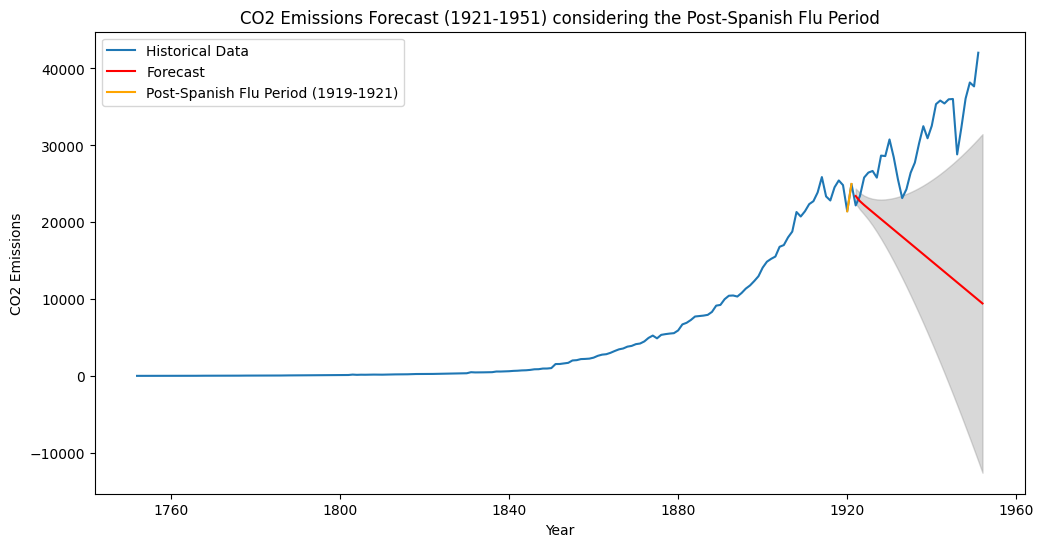

CO2 Emissions During the Post-Spanish Flu Period (1919-1921):
year_copy
1919-12-31    21446.094
1920-12-31    24997.031
Freq: A-DEC, Name: co2, dtype: float64
Total Forecasted CO2 Emissions: 506056.91
Mean Absolute Percentage Error (MAPE): 41.52%
ADF Statistic: 3.693730963061461
p-value: 1.0


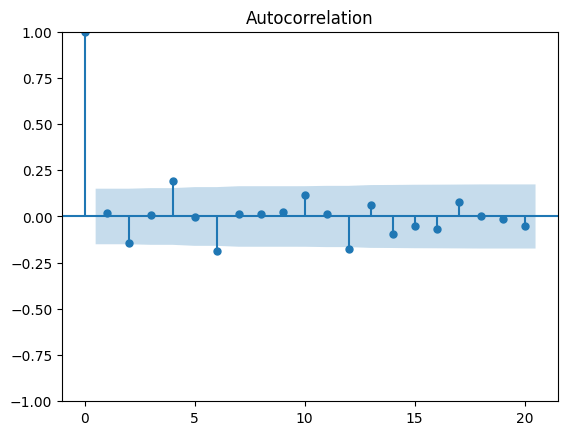

ARCH Statistic: 131.3336478660213
p-value: 2.4962400611840927e-23
Jarque-Bera Statistic: 3086.8231664337263
p-value: 0.0


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Select the data for the period 1751-1919
start_date = pd.to_datetime('1751', format='%Y')
start_date_flu = pd.to_datetime('1918', format='%Y')
end_date_train = pd.to_datetime('1921', format='%Y')
end_date_flu = pd.to_datetime('1919', format='%Y')
end_date_forecast = pd.to_datetime('1950', format='%Y')
co2_data = df.loc[(df['year'] >= start_date) & (df['year'] <= end_date_forecast), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Calculate optimal parameters for SARIMA using auto_arima
sarima_model = auto_arima(co2_data, seasonal=True, stepwise=True, suppress_warnings=True)

# Get optimal SARIMA parameters
optimal_p, optimal_d, optimal_q = sarima_model.order
optimal_P, optimal_D, optimal_Q, optimal_S = sarima_model.seasonal_order
# Manually specify the seasonal component based on domain knowledge
optimal_S = 1  # Change this value according to your data's seasonal pattern

print(f"Optimal SARIMA Parameters:")
print(f"p: {optimal_p}, d: {optimal_d}, q: {optimal_q}")
print(f"P: {optimal_P}, D: {optimal_D}, Q: {optimal_Q}, S: {optimal_S}")

# Train the SARIMA model using the optimal parameters
train_data = co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_train)]
sarima_model_fit = ARIMA(train_data, order=(optimal_p, optimal_d, optimal_q), seasonal_order=(optimal_P, optimal_D, optimal_Q, 12)).fit()

# Get CO2 values during the post-Spanish Flu period
post_flu_data = co2_data.loc[(co2_data.index > end_date_flu) & (co2_data.index <= end_date_train)]

# Combine training data with post-Spanish Flu period data
train_data = pd.concat([train_data, post_flu_data])

# Forecasting for the period 1920-2021
forecast_years = end_date_forecast.year - end_date_flu.year
forecast = sarima_model_fit.get_forecast(steps=forecast_years)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Calculate the total forecasted CO2 emissions
total_forecast = forecast_values.sum()

# Calculate the MAPE
mape_data = co2_data.loc[end_date_flu:end_date_forecast]
mape_forecast = forecast_values.loc[end_date_flu:end_date_forecast]
mape = (abs(mape_data - mape_forecast) / mape_data).mean() * 100

# Plotting the actual data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Historical Data')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.plot(post_flu_data.index, post_flu_data, color='orange', label='Post-Spanish Flu Period (1919-1921)')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Forecast (1921-1951) considering the Post-Spanish Flu Period')
plt.legend()
plt.savefig("post_spanishflu.eps") #save as eps
# Save the plot as a TIFF file
plt.savefig("post_spanishflu.tiff", format='tiff')
plt.show()

print(f"CO2 Emissions During the Post-Spanish Flu Period (1919-1921):")
print(post_flu_data)
print(f"Total Forecasted CO2 Emissions: {total_forecast:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test_result = adfuller(train_data)
print("ADF Statistic:", adf_test_result[0])
print("p-value:", adf_test_result[1])
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF for residuals
plot_acf(sarima_model_fit.resid, lags=20)
plt.show()

from statsmodels.stats.diagnostic import het_arch

# Perform ARCH test for heteroskedasticity
het_arch_test_result = het_arch(sarima_model_fit.resid)
print("ARCH Statistic:", het_arch_test_result[0])
print("p-value:", het_arch_test_result[1])

from scipy.stats import jarque_bera

# Perform Jarque-Bera test for normality
jarque_bera_test_result = jarque_bera(sarima_model_fit.resid)
print("Jarque-Bera Statistic:", jarque_bera_test_result[0])
print("p-value:", jarque_bera_test_result[1])


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


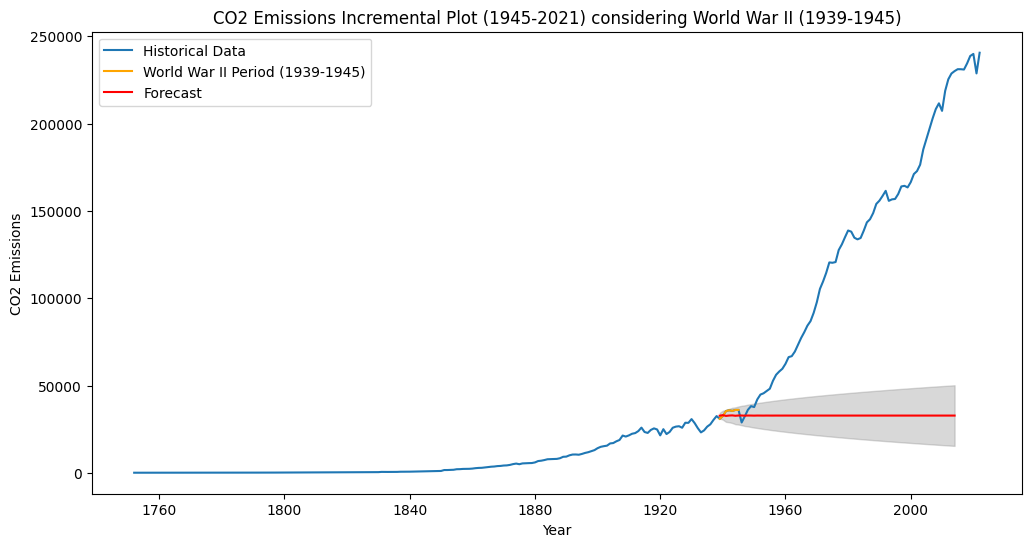

Total Forecasted CO2 Emissions: 2491964.35


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Select the data for the period 1751-1945
start_date = pd.to_datetime('1751', format='%Y')
end_date_train = pd.to_datetime('1938', format='%Y')  # Update end date for training data
end_date_war = pd.to_datetime('1945', format='%Y')  # Define end date for World War II period
end_date_forecast = pd.to_datetime('2021', format='%Y')
co2_data = df.loc[(df['year'] >= start_date) & (df['year'] <= end_date_forecast), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Train the ARIMA model using the data from 1751 to 1938
train_data = co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_train)]
model = ARIMA(train_data, order=(2, 1, 2))
model_fit = model.fit()

# Get CO2 values during the World War II period
war_data = co2_data.loc[(co2_data.index > end_date_train) & (co2_data.index <= end_date_war)]

# Combine training data with World War II period data
train_data = pd.concat([train_data, war_data])

# Forecasting for the period 1945-2021
forecast_years = end_date_forecast.year - end_date_war.year
forecast = model_fit.get_forecast(steps=forecast_years)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Calculate the total forecasted CO2 emissions
total_forecast = forecast_values.sum()

# Plotting the incremental plot for World War II period
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Historical Data')
plt.plot(war_data.index, war_data, color='orange', label='World War II Period (1939-1945)')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Incremental Plot (1945-2021) considering World War II (1939-1945)')
plt.legend()
plt.show()

print(f"Total Forecasted CO2 Emissions: {total_forecast:.2f}")


Optimal ARIMA Parameters: p = 5, d = 2, q = 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


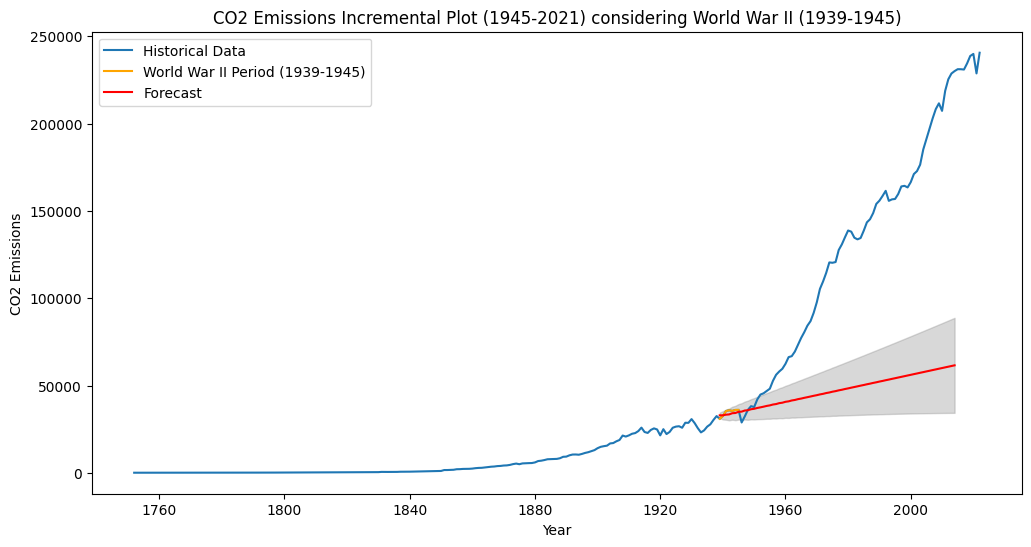

Total Forecasted CO2 Emissions: 3573417.66


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Select the data for the period 1751-1945
start_date = pd.to_datetime('1751', format='%Y')
end_date_train = pd.to_datetime('1938', format='%Y')  # Update end date for training data
end_date_war = pd.to_datetime('1945', format='%Y')  # Define end date for World War II period
end_date_forecast = pd.to_datetime('2021', format='%Y')
co2_data = df.loc[(df['year'] >= start_date) & (df['year'] <= end_date_forecast), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Train the ARIMA model using the data from 1751 to 1938
train_data = co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_train)]

# Use auto_arima to find the optimal parameters
model = auto_arima(train_data, seasonal=False, stepwise=True)
# Print the optimal values of p, d, and q
print(f"Optimal ARIMA Parameters: p = {model.order[0]}, d = {model.order[1]}, q = {model.order[2]}")

# Fit the ARIMA model with the optimal parameters
model_fit = ARIMA(train_data, order=model.order).fit()

# Get CO2 values during the World War II period
war_data = co2_data.loc[(co2_data.index > end_date_train) & (co2_data.index <= end_date_war)]

# Combine training data with World War II period data
train_data = pd.concat([train_data, war_data])

# Forecasting for the period 1945-2021
forecast_years = end_date_forecast.year - end_date_war.year
forecast = model_fit.get_forecast(steps=forecast_years)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Calculate the total forecasted CO2 emissions
total_forecast = forecast_values.sum()

# Plotting the incremental plot for World War II period
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Historical Data')
plt.plot(war_data.index, war_data, color='orange', label='World War II Period (1939-1945)')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Incremental Plot (1945-2021) considering World War II (1939-1945)')
plt.legend()
plt.show()

print(f"Total Forecasted CO2 Emissions: {total_forecast:.2f}")


Optimal SARIMA Parameters:
p: 0, d: 2, q: 1
P: 0, D: 0, Q: 0, S: 1


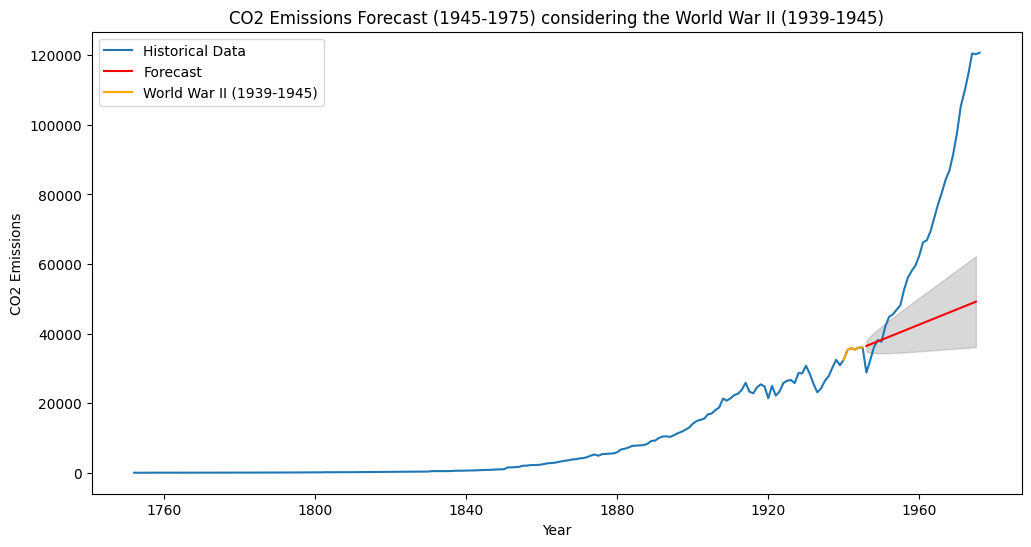

CO2 Emissions During World War II (1939-1945):
year_copy
1939-12-31    32549.562
1940-12-31    35366.757
1941-12-31    35833.716
1942-12-31    35453.099
1943-12-31    35993.357
1944-12-31    36035.041
Freq: A-DEC, Name: co2, dtype: float64
Total Forecasted CO2 Emissions: 1284916.93
Mean Absolute Percentage Error (MAPE): 32.10%


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Select the data for the period 1751-1919
start_date = pd.to_datetime('1751', format='%Y')
start_date_ww2 = pd.to_datetime('1939', format='%Y')
end_date_train = pd.to_datetime('1945', format='%Y')
end_date_ww2 = pd.to_datetime('1945', format='%Y')
end_date_forecast = pd.to_datetime('1975', format='%Y')
co2_data = df.loc[(df['year'] >= start_date) & (df['year'] <= end_date_forecast), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Calculate optimal parameters for SARIMA using auto_arima
sarima_model = auto_arima(co2_data, seasonal=True, stepwise=True, suppress_warnings=True)

# Get optimal SARIMA parameters
optimal_p, optimal_d, optimal_q = sarima_model.order
optimal_P, optimal_D, optimal_Q, optimal_S = sarima_model.seasonal_order
# Manually specify the seasonal component based on domain knowledge
optimal_S = 1  # Change this value according to your data's seasonal pattern

print(f"Optimal SARIMA Parameters:")
print(f"p: {optimal_p}, d: {optimal_d}, q: {optimal_q}")
print(f"P: {optimal_P}, D: {optimal_D}, Q: {optimal_Q}, S: {optimal_S}")

# Train the SARIMA model using the optimal parameters
train_data = co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_train)]
sarima_model_fit = ARIMA(train_data, order=(optimal_p, optimal_d, optimal_q), seasonal_order=(optimal_P, optimal_D, optimal_Q, 12)).fit()

# Get CO2 values during the World War II period
ww2_data = co2_data.loc[(co2_data.index > start_date_ww2) & (co2_data.index <= end_date_ww2)]

# Combine training data with World War II period data
train_data = pd.concat([train_data, ww2_data])

# Forecasting for the period 1946-1975
forecast_years = end_date_forecast.year - end_date_ww2.year
forecast = sarima_model_fit.get_forecast(steps=forecast_years)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Calculate the total forecasted CO2 emissions
total_forecast = forecast_values.sum()

# Calculate the MAPE
mape_data = co2_data.loc[end_date_ww2:end_date_forecast]
mape_forecast = forecast_values.loc[end_date_ww2:end_date_forecast]
mape = (abs(mape_data - mape_forecast) / mape_data).mean() * 100

# Plotting the actual data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Historical Data')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.plot(ww2_data.index, ww2_data, color='orange', label='World War II (1939-1945)')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Forecast (1945-1975) considering the World War II (1939-1945)')
plt.legend()
plt.savefig("WWII.eps") #save as eps
# Save the plot as a TIFF file
plt.savefig("WWII.tiff", format='tiff')
plt.show()

print(f"CO2 Emissions During World War II (1939-1945):")
print(ww2_data)
print(f"Total Forecasted CO2 Emissions: {total_forecast:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Optimal SARIMA Parameters:
p: 0, d: 2, q: 1
P: 0, D: 0, Q: 0, S: 1


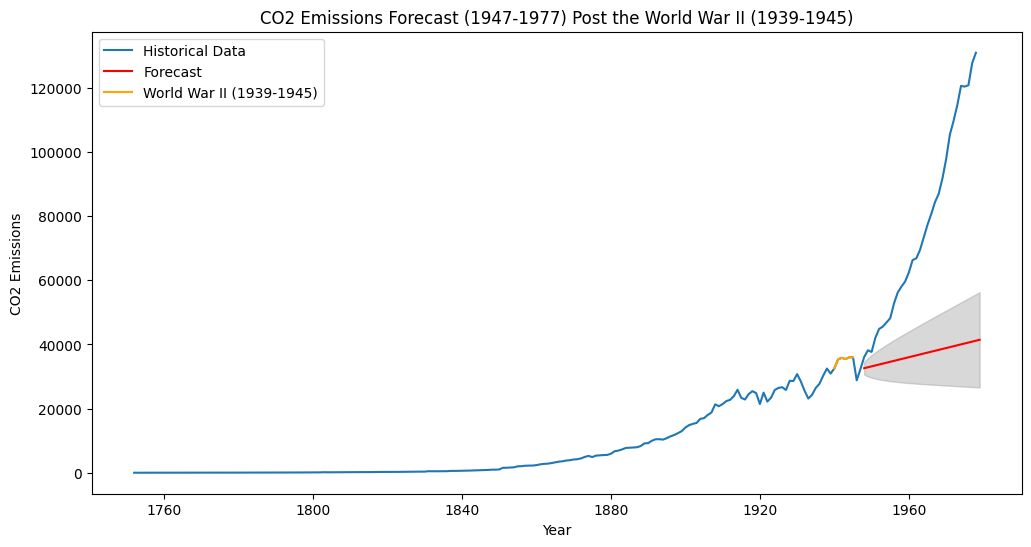

CO2 Emissions During World War II (1939-1945):
year_copy
1939-12-31    32549.562
1940-12-31    35366.757
1941-12-31    35833.716
1942-12-31    35453.099
1943-12-31    35993.357
1944-12-31    36035.041
Freq: A-DEC, Name: co2, dtype: float64
Total Forecasted CO2 Emissions: 1184828.10
Mean Absolute Percentage Error (MAPE): 44.43%


In [35]:
start_date = pd.to_datetime('1751', format='%Y')
start_date_ww2 = pd.to_datetime('1939', format='%Y')
end_date_train = pd.to_datetime('1947', format='%Y')
end_date_ww2 = pd.to_datetime('1945', format='%Y')
end_date_forecast = pd.to_datetime('1977', format='%Y')
co2_data = df.loc[(df['year'] >= start_date) & (df['year'] <= end_date_forecast), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Calculate optimal parameters for SARIMA using auto_arima
sarima_model = auto_arima(co2_data, seasonal=True, stepwise=True, suppress_warnings=True)

# Get optimal SARIMA parameters
optimal_p, optimal_d, optimal_q = sarima_model.order
optimal_P, optimal_D, optimal_Q, optimal_S = sarima_model.seasonal_order
# Manually specify the seasonal component based on domain knowledge
optimal_S = 1  # Change this value according to your data's seasonal pattern

print(f"Optimal SARIMA Parameters:")
print(f"p: {optimal_p}, d: {optimal_d}, q: {optimal_q}")
print(f"P: {optimal_P}, D: {optimal_D}, Q: {optimal_Q}, S: {optimal_S}")

# Train the SARIMA model using the optimal parameters
train_data = co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_train)]
sarima_model_fit = ARIMA(train_data, order=(optimal_p, optimal_d, optimal_q), seasonal_order=(optimal_P, optimal_D, optimal_Q, 12)).fit()

# Get CO2 values during the World War II period
ww2_data = co2_data.loc[(co2_data.index > start_date_ww2) & (co2_data.index <= end_date_ww2)]

# Combine training data with World War II period data
train_data = pd.concat([train_data, ww2_data])

# Forecasting for the period 1946-1975
forecast_years = end_date_forecast.year - end_date_ww2.year
forecast = sarima_model_fit.get_forecast(steps=forecast_years)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Calculate the total forecasted CO2 emissions
total_forecast = forecast_values.sum()

# Calculate the MAPE
mape_data = co2_data.loc[end_date_ww2:end_date_forecast]
mape_forecast = forecast_values.loc[end_date_ww2:end_date_forecast]
mape = (abs(mape_data - mape_forecast) / mape_data).mean() * 100

# Plotting the actual data and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Historical Data')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.plot(ww2_data.index, ww2_data, color='orange', label='World War II (1939-1945)')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Forecast (1947-1977) Post the World War II (1939-1945)')
plt.legend()
plt.savefig("post_WWII.eps") #save as eps
# Save the plot as a TIFF file
plt.savefig("post_WWII.tiff", format='tiff')
plt.show()

print(f"CO2 Emissions During World War II (1939-1945):")
print(ww2_data)
print(f"Total Forecasted CO2 Emissions: {total_forecast:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Optimal SARIMA Parameters:
p: 0, d: 2, q: 2
P: 0, D: 0, Q: 0, S: 1


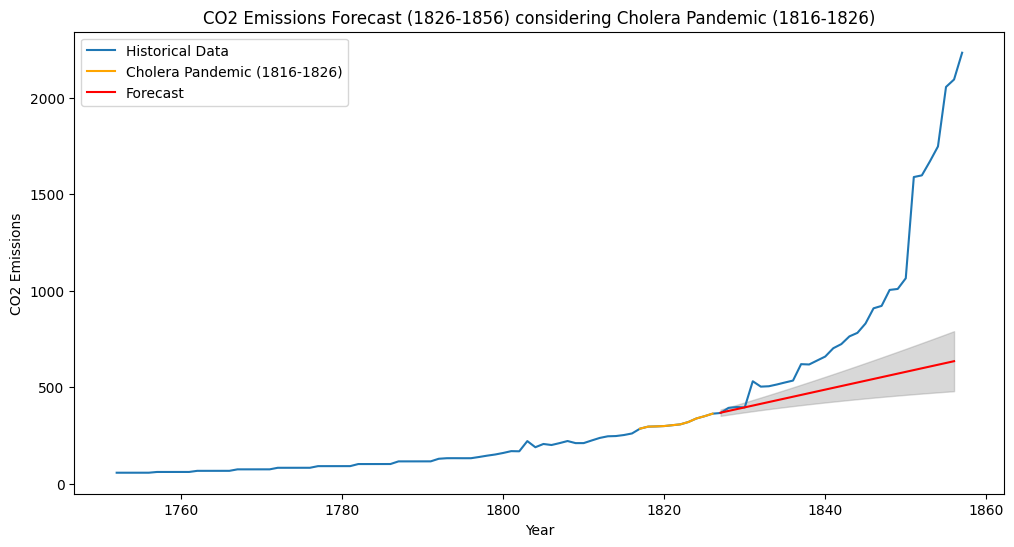

Total Forecasted CO2 Emissions: 15030.51
Mean Absolute Percentage Error (MAPE): 32.70%


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Select the data for the period 1751-1850
start_date = pd.to_datetime('1751', format='%Y')
end_date_train = pd.to_datetime('1826', format='%Y')  # Update end date for training data
date_pandemic_start = pd.to_datetime('1816', format='%Y')  # Define start date for Cholera Pandemic
end_date_pandemic = pd.to_datetime('1826', format='%Y')  # Define end date for Cholera Pandemic
end_date_forecast = pd.to_datetime('1856', format='%Y')
co2_data = df.loc[(df['year'] >= start_date) & (df['year'] <= end_date_forecast), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Train the ARIMA model using the data from 1751 to 1850
train_data = co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_train)]

# Calculate optimal parameters for SARIMA using auto_arima
sarima_model = auto_arima(train_data, seasonal=True, stepwise=True, suppress_warnings=True)
optimal_p, optimal_d, optimal_q = sarima_model.order
optimal_P, optimal_D, optimal_Q, optimal_S = sarima_model.seasonal_order
optimal_S = 1  # Manually specify the seasonal component based on domain knowledge
print(f"Optimal SARIMA Parameters:")
print(f"p: {optimal_p}, d: {optimal_d}, q: {optimal_q}")
print(f"P: {optimal_P}, D: {optimal_D}, Q: {optimal_Q}, S: {optimal_S}")

# Train the SARIMA model using the optimal parameters
train_data = co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_train)]
sarima_model_fit = ARIMA(train_data, order=(optimal_p, optimal_d, optimal_q), seasonal_order=(optimal_P, optimal_D, optimal_Q, 12)).fit()

# Calculate the MAPE
mape_data = co2_data.loc[end_date_pandemic:end_date_forecast]
forecast = sarima_model_fit.get_forecast(steps=len(mape_data))
forecast_values = forecast.predicted_mean
mape = (abs(mape_data - forecast_values) / mape_data).mean() * 100

# Get CO2 values during the Cholera Pandemic period
pandemic_data = co2_data.loc[(co2_data.index >= date_pandemic_start) & (co2_data.index <= end_date_pandemic)]

# Forecasting for the period 1851-1900
forecast_years = end_date_forecast.year - end_date_pandemic.year
forecast = sarima_model_fit.get_forecast(steps=forecast_years)
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Calculate the total forecasted CO2 emissions
total_forecast = forecast_values.sum()

# Plotting the incremental plot for Cholera Pandemic period
plt.figure(figsize=(12, 6))
plt.plot(co2_data.index, co2_data, label='Historical Data')
plt.plot(pandemic_data.index, pandemic_data, color='orange', label='Cholera Pandemic (1816-1826)')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Forecast (1826-1856) considering Cholera Pandemic (1816-1826)')
plt.legend()
plt.savefig("Cholera.eps")  # Save as EPS
# Save the plot as a TIFF file
plt.savefig("Cholera.tiff", format='tiff')
plt.show()

print(f"Total Forecasted CO2 Emissions: {total_forecast:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Optimal SARIMA Parameters:
p: 2, d: 2, q: 3
P: 0, D: 0, Q: 0, S: 0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


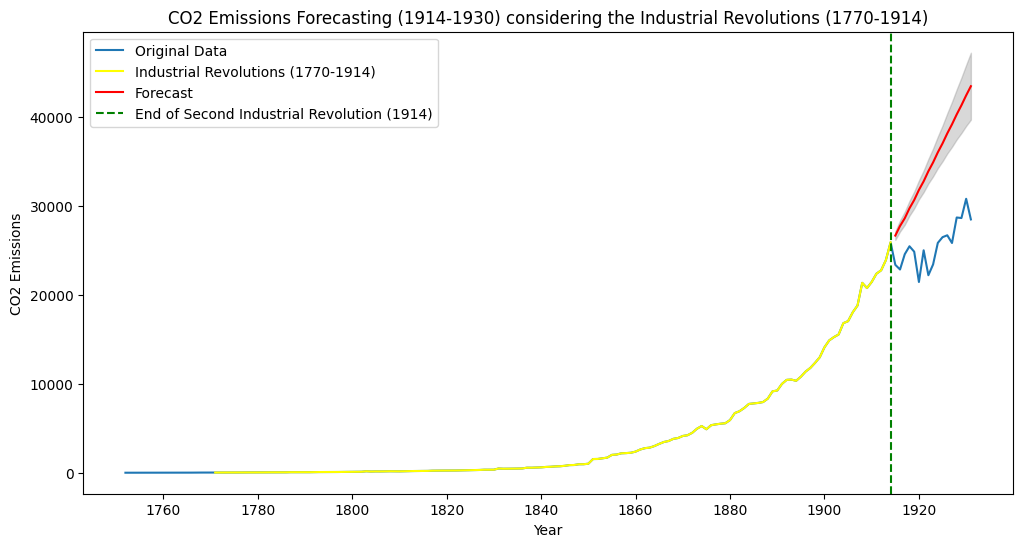

CO2 Emissions During the Industrial Revolutions (1770-1914):
year_copy
1751-12-31       56.106
1752-12-31       56.124
1753-12-31       56.124
1754-12-31       56.148
1755-12-31       56.172
                ...    
1909-12-31    21445.413
1910-12-31    22371.125
1911-12-31    22753.365
1912-12-31    23892.945
1913-12-31    25888.987
Freq: A-DEC, Name: co2, Length: 163, dtype: float64
Total Forecasted CO2 Emissions (1914-1930): 593994.10
Mean Absolute Percentage Error (MAPE): 35.49%


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import numpy as np



# Select the data for the period 1751-1950
start_date = pd.to_datetime('1751', format='%Y')
end_date_revolution = pd.to_datetime('1914', format='%Y')  # End date for First and Second Industrial Revolution
start_date_revolution = pd.to_datetime('1770', format='%Y')  # Start date for First and Second Industrial Revolution
start_date_forecast = pd.to_datetime('1914', format='%Y')  # Start date for forecasting
end_date_forecast = pd.to_datetime('1930', format='%Y')    # End date for forecasting

co2_data = df.loc[(df['year'] >= start_date) & (df['year'] <= end_date_forecast), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Train the ARIMA model using the data from 1751 to 1914
train_data = co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_revolution)]

# Perform auto_arima to find optimal parameters
sarima_model = auto_arima(train_data, seasonal=True, stepwise=True, suppress_warnings=True)

# Get optimal SARIMA parameters
optimal_p, optimal_d, optimal_q = sarima_model.order
optimal_P, optimal_D, optimal_Q, optimal_S = sarima_model.seasonal_order

print(f"Optimal SARIMA Parameters:")
print(f"p: {optimal_p}, d: {optimal_d}, q: {optimal_q}")
print(f"P: {optimal_P}, D: {optimal_D}, Q: {optimal_Q}, S: {optimal_S}")

# Train the SARIMA model using the optimal parameters
sarima_model_fit = ARIMA(train_data, order=(optimal_p, optimal_d, optimal_q), seasonal_order=(optimal_P, optimal_D, optimal_Q, optimal_S)).fit()

# Forecasting for the period 1914-1930
forecast_years = end_date_forecast.year - start_date_forecast.year + 1
forecast = sarima_model_fit.get_forecast(steps=forecast_years)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Calculate the total forecasted CO2 emissions
total_forecast = forecast_values.sum()

# Calculate the MAPE (Mean Absolute Percentage Error)
actual_values = co2_data.loc[start_date_forecast:end_date_forecast]
mape = (abs(actual_values - forecast_values) / actual_values).mean() * 100

# Plotting the original data and the forecasted values
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(co2_data.index, co2_data, label='Original Data')

# Highlight the revolution period with a yellow line
plt.plot(co2_data.loc[(co2_data.index >= start_date_revolution) & (co2_data.index <= end_date_revolution)].index,
         co2_data.loc[(co2_data.index >= start_date_revolution) & (co2_data.index <= end_date_revolution)],
         color='yellow', label='Industrial Revolutions (1770-1914)')

# Plot the forecasted values
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')

# Add confidence intervals for the forecast
plt.fill_between(forecast_values.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)

# Add a vertical line at the end of the revolution period
plt.axvline(x=end_date_revolution, color='green', linestyle='--', label='End of Second Industrial Revolution (1914)')

plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Forecasting (1914-1930) considering the Industrial Revolutions (1770-1914)')
plt.legend()

# Save the plot as a JPEG file
plt.savefig("industrial_revolution_forecast.jpg", format='jpeg')
# Save the plot as a TIFF file
plt.savefig("industrial_revolution_forecast.tiff", format='tiff')
plt.show()

print(f"CO2 Emissions During the Industrial Revolutions (1770-1914):")
print(co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_revolution)])
print(f"Total Forecasted CO2 Emissions (1914-1930): {total_forecast:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Optimal SARIMA Parameters:
p: 0, d: 2, q: 2
P: 0, D: 0, Q: 0, S: 0


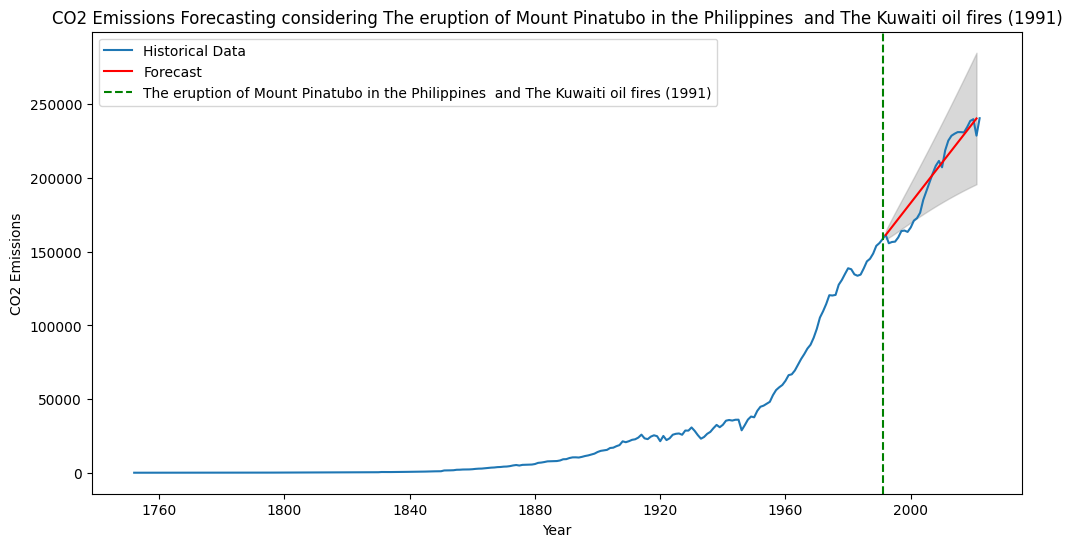

Total Forecasted CO2 Emissions (1991-2021): 6026583.35
Mean Absolute Percentage Error (MAPE): 4.43%


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Select the data for the period 1751-1991
start_date = pd.to_datetime('1751', format='%Y')
end_date_train = pd.to_datetime('1991', format='%Y')  # Update end date for training data
end_date_forecast = pd.to_datetime('2021', format='%Y')

co2_data = df.loc[(df['year'] >= start_date) & (df['year'] <= end_date_forecast), 'co2']
co2_data = co2_data.groupby(pd.Grouper(freq='Y')).sum()

# Train the ARIMA model using the data from 1751 to 1991
train_data = co2_data.loc[(co2_data.index >= start_date) & (co2_data.index <= end_date_train)]

# Perform auto_arima to find optimal parameters
sarima_model = auto_arima(train_data, seasonal=True, stepwise=True, suppress_warnings=True)

# Get optimal SARIMA parameters
optimal_p, optimal_d, optimal_q = sarima_model.order
optimal_P, optimal_D, optimal_Q, optimal_S = sarima_model.seasonal_order

print(f"Optimal SARIMA Parameters:")
print(f"p: {optimal_p}, d: {optimal_d}, q: {optimal_q}")
print(f"P: {optimal_P}, D: {optimal_D}, Q: {optimal_Q}, S: {optimal_S}")

# Train the SARIMA model using the optimal parameters
sarima_model_fit = ARIMA(train_data, order=(optimal_p, optimal_d, optimal_q), seasonal_order=(optimal_P, optimal_D, optimal_Q, optimal_S)).fit()

# Forecasting for the next 30 years
forecast_years = 30
forecast = sarima_model_fit.get_forecast(steps=forecast_years)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
ci = forecast.conf_int()

# Calculate the total forecasted CO2 emissions
total_forecast = forecast_values.sum()

# Calculate the MAPE (Mean Absolute Percentage Error)
actual_values = co2_data.loc[end_date_train:end_date_forecast]
mape = (abs(actual_values - forecast_values[:len(actual_values)]) / actual_values).mean() * 100

# Plotting the original data and the forecasted values
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(co2_data.index, co2_data, label='Historical Data')



# Plot the forecasted values
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')

# Add confidence intervals for the forecast
plt.fill_between(forecast_values.index, ci.iloc[:, 0], ci.iloc[:, 1], color='gray', alpha=0.3)

# Add a vertical line at 1991
plt.axvline(x=end_date_train, color='green', linestyle='--', label='The eruption of Mount Pinatubo in the Philippines  and The Kuwaiti oil fires (1991)')

plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Forecasting considering The eruption of Mount Pinatubo in the Philippines  and The Kuwaiti oil fires (1991)')
plt.legend()

# Save the plot as a JPEG file
plt.savefig("Pinatubo.jpg", format='jpeg')
# Save the plot as a TIFF file
plt.savefig("Pinatubo.tiff", format='tiff')
plt.show()

print(f"Total Forecasted CO2 Emissions (1991-2021): {total_forecast:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
